# Liberaries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Random data

In [2]:
X = 2 * np.random.rand(50, 1)
y = (4 + 3 * X + np.random.randn(50, 1)).flatten() 

In [3]:
X = X.reshape(-1, 1)

In [4]:
X_new = np.insert(arr=X, obj=0, values=1, axis=1)
X_new

array([[1.        , 0.0795423 ],
       [1.        , 0.17223362],
       [1.        , 1.3547038 ],
       [1.        , 1.31737483],
       [1.        , 0.59215617],
       [1.        , 0.86629966],
       [1.        , 1.3641223 ],
       [1.        , 1.88776414],
       [1.        , 1.04267075],
       [1.        , 1.43236624],
       [1.        , 1.44713065],
       [1.        , 1.13626224],
       [1.        , 0.06676245],
       [1.        , 1.61135653],
       [1.        , 0.38701605],
       [1.        , 1.11794862],
       [1.        , 1.8897758 ],
       [1.        , 0.41702345],
       [1.        , 1.77487542],
       [1.        , 0.17601578],
       [1.        , 0.1030304 ],
       [1.        , 0.06988381],
       [1.        , 1.31905504],
       [1.        , 1.97662828],
       [1.        , 1.12080316],
       [1.        , 1.97512512],
       [1.        , 1.00368606],
       [1.        , 1.74829689],
       [1.        , 1.27433467],
       [1.        , 0.86953331],
       [1.

In [5]:
y

array([ 5.70811881,  7.09815823,  8.16648759,  7.99983629,  5.32519322,
        4.9101794 ,  8.30249165, 11.63356699,  6.84095798, 10.09695602,
        6.93747357,  6.69436097,  4.65376438,  9.05051895,  4.62272156,
        8.32988593, 10.35758762,  4.44059622,  8.23854576,  4.63082769,
        3.76842276,  4.07665868,  9.40245312,  9.21109594,  8.49266781,
        9.14442667,  6.06482163,  8.27134655,  6.70687228,  5.43517436,
        6.09686685,  4.64006391,  5.20508684,  5.52460943,  8.2405411 ,
        8.34170289,  3.26379872,  6.79894427,  8.96569499,  5.40283029,
        3.76364206,  8.22085473,  6.14757003,  9.21111373, 11.09335057,
        3.93435555,  7.2665947 ,  6.45030578,  6.25432229,  9.75708975])

In [6]:
X_new.shape, y.shape

((50, 2), (50,))

# Gradient Descend Function

In [28]:
def GRD(features, target, iter=100000, tol=0.0001, alpha=0.01):
    m = len(features) # number of recoreds in the data
    thetas = np.random.random(features.shape[1])
    predicitons = features @ thetas.T
    error = predicitons - target
    cost_func = (1/2*m) * sum(error**2)
    iteration = 0
    while cost_func > tol and iteration < iter:
        gradient = (features.T @ error)/m
        thetas = thetas - alpha * gradient
        predicitons = features @ thetas.T
        error = predicitons - target
        cost_func = (1/2*m) * sum(error**2)
        iteration+=1
    return thetas

Thetas = GRD(features=X_new, target=y )
Thetas

array([3.9963014 , 2.94591088])

In [8]:
predictions = X_new @ Thetas.T
predictions

array([ 3.53834224,  3.86013668,  7.96529246,  7.83569831,  5.31797258,
        6.26971054,  7.99799046,  9.81590636,  6.88201419,  8.23491145,
        8.28616874,  7.2069337 ,  3.49397472,  8.85630813,  4.60579213,
        7.14335471,  9.82289021,  4.70996814,  9.42399307,  3.87326713,
        3.61988537,  3.5048111 ,  7.84153144, 10.12441405,  7.15326475,
       10.11919556,  6.74667188,  9.33172096,  7.68627672,  6.28093673,
        6.72550792,  6.68892527,  4.28714107,  5.30667447,  7.58986832,
        8.30442364,  3.82816328,  6.94102712,  9.64248111,  4.38671712,
        3.9882514 ,  7.57781632,  4.94804646,  9.96051358, 10.13938453,
        3.60856175,  6.94416278,  5.20752486,  5.33707519, 10.18442991])

In [9]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,5.708119,3.538342
1,7.098158,3.860137
2,8.166488,7.965292
3,7.999836,7.835698
4,5.325193,5.317973
5,4.910179,6.269711
6,8.302492,7.997990
7,11.633567,9.815906
8,6.840958,6.882014
9,10.096956,8.234911


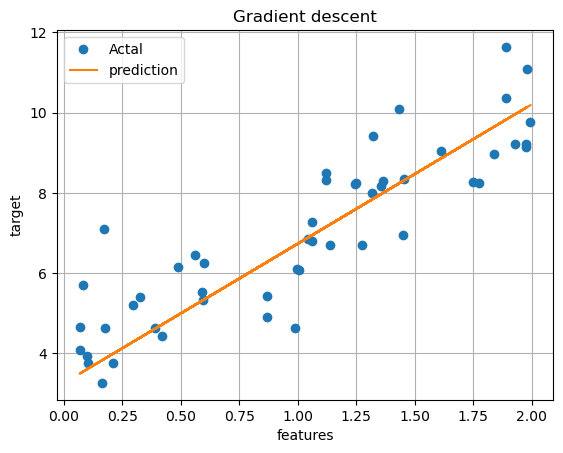

In [10]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Gradient descent")
plt.legend()
plt.grid()
plt.show()

# Mini-batch gradient descent

In [11]:
def MGDS(features, target, iter=100000, tol=0.0001, alpha=0.01, n_samples=5):
    m = len(features)
    thetas = np.random.random(features.shape[1])
    for _ in range(iter):
        for i in range(0, len(features), n_samples):
            predictions = features[i:i+n_samples] @ thetas.T
            error = predictions - target[i:i+n_samples]
            # cost_func = (1/2*m) * sum(error**2)
            gradient = (features[i:i+n_samples].T @ error)/m
            thetas = thetas - alpha * gradient
            
        pred = features @ thetas.T
        error2 = pred - target
        cost_func = (1/2*m) * sum(error2**2)
        if cost_func <= tol:
            print(f"The tolerance achieved")
            print(f"Thetas {thetas}")
            break
    print("number of iteration achieved")
    return thetas
Thetas = MGDS(features=X_new, target=y)
Thetas        

number of iteration achieved


array([3.99597876, 2.94541742])

In [12]:
predictions = X_new @ Thetas.T
predictions

array([4.23026402, 4.50327867, 7.98614692, 7.87619754, 5.74012586,
       6.54759288, 8.01388833, 9.55623213, 7.06707936, 8.21489522,
       8.25838258, 7.34274535, 4.19262204, 8.74209635, 5.13590257,
       7.2888041 , 9.56215732, 5.22428688, 9.22372774, 4.51441872,
       4.29944629, 4.20181576, 7.88114644, 9.81797412, 7.29721191,
       9.81354669, 6.95225317, 9.14544286, 7.74942629, 6.55711733,
       6.93429739, 6.90326018, 4.86555482, 5.73054039, 7.66763213,
       8.27387028, 4.47615202, 7.11714671, 9.40909587, 4.95003645,
       4.61197288, 7.65740706, 5.42627566, 9.6789188 , 9.83067527,
       4.28983918, 7.11980704, 5.64642055, 5.75633276, 9.86889237])

In [13]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,5.708119,4.230264
1,7.098158,4.503279
2,8.166488,7.986147
3,7.999836,7.876198
4,5.325193,5.740126
5,4.910179,6.547593
6,8.302492,8.013888
7,11.633567,9.556232
8,6.840958,7.067079
9,10.096956,8.214895


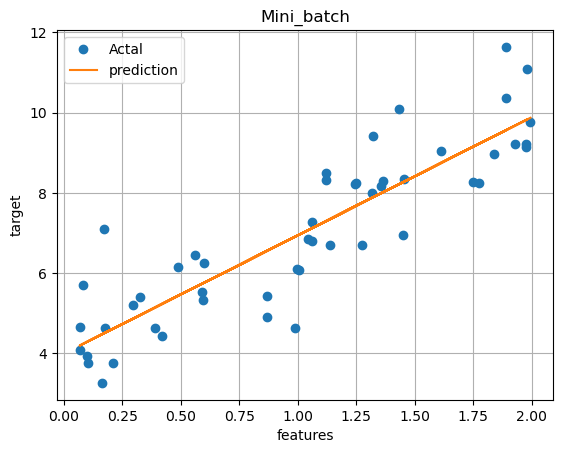

In [14]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Mini_batch")
plt.legend()
plt.grid()
plt.show()

# Stochastic gradient descent

In [15]:
def SGD(features, target, iter=100000, tol=0.0001, alpha=0.01):
    m = len(features)
    thetas = np.random.random(features.shape[1])
    for _ in range(iter):
        for i in range(0, len(features), 1):
            predictions = features[i:i+1] @ thetas.T
            error = predictions - target[i:i+1]
            # cost_func = (1/2*m) * sum(error**2)
            gradient = (features[i:i+1].T @ error)/m
            thetas = thetas - alpha * gradient
            
        pred = features @ thetas.T
        error2 = pred - target
        cost_func = (1/2*m) * sum(error2**2)
        if cost_func <= tol:
            print(f"The tolerance achieved")
            print(f"Thetas {thetas}")
            break
    print("number of iteration achieved")
    return thetas
Thetas = SGD(features=X_new, target=y)
Thetas        

number of iteration achieved


array([3.996158  , 2.94532334])

In [16]:
predictions = X_new @ Thetas.T
predictions

array([4.23043578, 4.5034417 , 7.98619871, 7.87625284, 5.74024938,
       6.54769062, 8.01393923, 9.55623377, 7.0671605 , 8.2149397 ,
       8.25842568, 7.34281769, 4.192795  , 8.74212399, 5.1360454 ,
       7.28887816, 9.56215877, 5.22442688, 9.22374   , 4.5145814 ,
       4.29961584, 4.20198842, 7.88120158, 9.8179674 , 7.29728571,
       9.8135401 , 6.95233798, 9.14545762, 7.74948564, 6.55721476,
       6.93438277, 6.90334656, 4.86570628, 5.73066423, 7.66769409,
       8.27391288, 4.47631592, 7.11722625, 9.4091022 , 4.95018522,
       4.61213245, 7.65746934, 5.42640921, 9.67891652, 9.83066815,
       4.29000903, 7.1198865 , 5.64654707, 5.75645577, 9.86888403])

In [17]:
df = pd.DataFrame({"Actual":y , "prediction":predictions})
df

,Actual,prediction
0,5.708119,4.230436
1,7.098158,4.503442
2,8.166488,7.986199
3,7.999836,7.876253
4,5.325193,5.740249
5,4.910179,6.547691
6,8.302492,8.013939
7,11.633567,9.556234
8,6.840958,7.067161
9,10.096956,8.214940


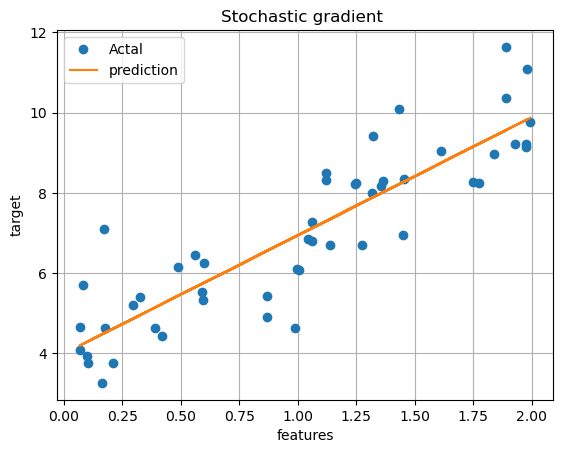

In [18]:
plt.plot(X, y, "o", label="Actal")
plt.plot(X, predictions, label="prediction")
plt.xlabel("features")
plt.ylabel("target")
plt.title("Stochastic gradient ")
plt.legend()
plt.grid()
plt.show()

# Test on actual dataset to get the thetas 

In [19]:
df = pd.read_csv(r"D:\2-Machine Learning\Dataset For Machine Learning\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
df = df.dropna()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
X_features = df.drop(columns=["Outcome"], axis=0)
target = df["Outcome"]

In [22]:
X_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)
X_features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [24]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
# Thetas from Stochastic gradient descent
thetas = SGD(features=X_features, target=target, iter=1000)
thetas

number of iteration achieved


array([ 0.06581929,  0.18782001, -0.045868  ,  0.00273555, -0.02011162,
        0.10462104,  0.04832061,  0.03523636])

In [26]:
# Thetas from Mini-batch gradient descent
thetas = MGDS(features=X_features, target=target, iter=1000)
thetas

number of iteration achieved


array([ 0.06422049,  0.18711403, -0.04658772,  0.00261413, -0.01981647,
        0.10535835,  0.04804919,  0.03729839])

In [29]:
# Thetas from gradient descent
thetas = GRD(features=X_features, target=target, iter=1000)
thetas

array([ 0.07009977,  0.18579189, -0.04454243, -0.00294444, -0.01613994,
        0.1073588 ,  0.04911768,  0.03040884])

# By: Moahmmed Hamza